In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('laptops.csv')

In [3]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


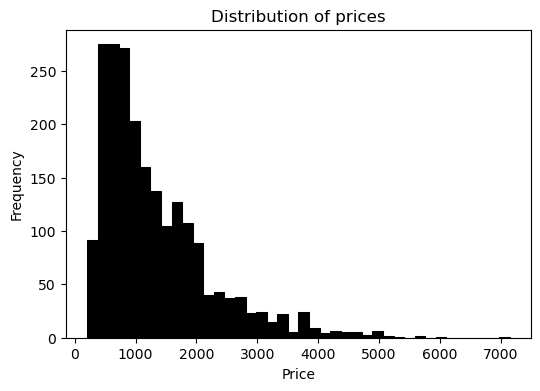

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()


In [7]:
#Ques1
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [8]:
#Ques2
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [9]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [10]:

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [11]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
668,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2073,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
1113,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
788,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


In [12]:
len(df_train),len(df_test),len(df_val)

(1296, 432, 432)

In [13]:
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)
df_val.reset_index(drop=True)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,MSI Raider GE68HX 13VF-045XES Intel Core i9-13...,New,MSI,Raider,Intel Core i9,32,1000,SSD,RTX 4060,16.0,No,2599.00
1,HP Pavilion 15-eg2004ns Intel Core i7-1255U/16...,New,HP,Pavilion,Intel Core i7,16,512,SSD,NaN,15.6,No,999.00
2,Acer Aspire 3 A315-56-52KD Intel Core i5-1035G...,Refurbished,Acer,Aspire,Intel Core i5,12,512,SSD,NaN,15.6,No,477.28
3,Apple Macbook Air Apple M2/8 GB/256GB SSD/GPU ...,Refurbished,Apple,MacBook Air,Apple M2,8,256,SSD,NaN,13.6,No,1519.00
4,Asus M515UA-EJ374 AMD Ryzen 5 5500U/8GB/512GB ...,New,Asus,M515UA,AMD Ryzen 5,8,512,SSD,NaN,15.6,No,402.99
...,...,...,...,...,...,...,...,...,...,...,...,...
427,Microsoft Surface Pro X Microsoft SQ1/8 GB/128...,Refurbished,Microsoft,Surface Pro,Microsoft SQ1,8,128,SSD,NaN,13.0,Yes,1049.00
428,Lenovo ThinkPad L13 Gen 2 AMD Ryzen 5 Pro 5650...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,13.3,No,799.00
429,HP Pavilion Laptop 14-CE3008NS Intel Core i5-1...,Refurbished,HP,Pavilion,Intel Core i5,8,512,SSD,MX 130,14.0,No,565.54
430,Lenovo ThinkPad T14 Intel Core i5-10210U/16GB/...,Refurbished,Lenovo,ThinkPad,Intel Core i5,16,512,SSD,NaN,14.0,No,738.00


In [14]:
y_train=np.log1p(df_train.final_price.values)
y_test=np.log1p(df_test.final_price.values)
y_val=np.log1p(df_val.final_price.values)

In [15]:
del df_train['final_price']
del df_test['final_price']
del df_val['final_price']

In [16]:
len(df_train)

1296

In [17]:
#Ques3
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [18]:
base=['ram','storage','screen']
df_train[base]

,ram,storage,screen
2079,32,1000,15.6
668,4,64,14.1
2073,32,1000,14.0
1113,16,512,13.3
788,32,1000,16.0
...,...,...,...
1777,8,256,14.0
183,32,1000,16.0
137,16,512,15.6
899,16,512,14.0


In [19]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [20]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [21]:
y_pred = w_0 + X_train.dot(w)

Text(0.5, 1.0, 'Predictions vs actual distribution')

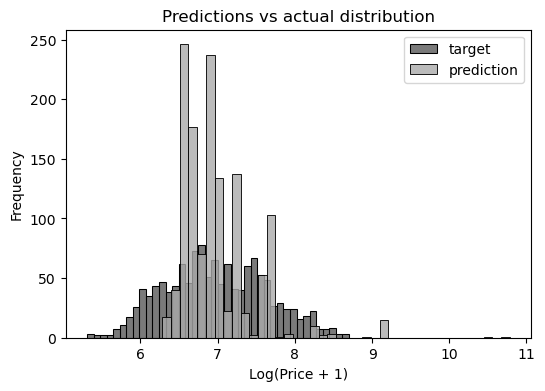

In [22]:

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')


In [23]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [24]:
rmse(y_train, y_pred)

0.44632651855038796

In [25]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [26]:
rmse(y_val, y_pred)

0.42886353154744117

In [27]:

def prepare_X(df):
    df_num = df[base]
    
    # Fill missing values with the mean of each column
    df_num = df_num.fillna(df_num.mean())
    
    X = df_num.values
    return X


In [28]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [29]:
y_pred = w_0 + X_train.dot(w)

In [30]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [31]:
rmse(y_train, y_pred)

0.4460856669097624

In [32]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [33]:
rmse(y_val, y_pred)

0.43117372937296733

In [34]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [35]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.44632651855038796
validation 0.42886353154744117


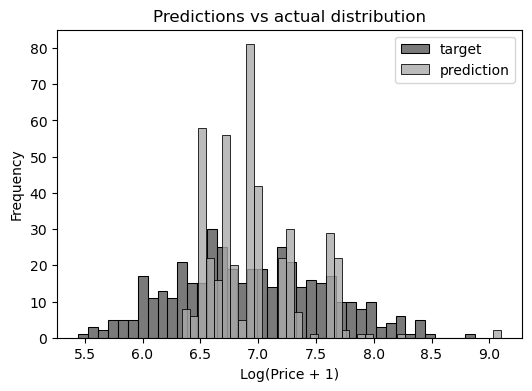

In [36]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()


In [37]:
df['laptop'].value_counts().head(5)

ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"    1
HP EliteBook 640 G9 Intel Core i5-1235U/8GB/512GB SSD/14"                      1
HP Pavilion x360 14-ek0018ns Intel Core  i5-1235U/8GB/512GB SSD/14" Táctil     1
HP Pavilion 15-EH1001NS AMD Ryzen 5 5500U/16GB/512GB SSD/15.6"                 1
HP Pavilion 14-dv1009ns Intel Core i5-1155G7/16GB/512GB SSD/14"                1
Name: laptop, dtype: int64

In [38]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.44632651855038796
validation: 0.42886353154744117


In [39]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [40]:
X_train = prepare_X(df_train)

In [41]:
#Ques4
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[1], w[2]))

    0, 6.73, 0.00, -0.04
0.001, 6.73, 0.00, -0.04
 0.01, 6.72, 0.00, -0.04
  0.1, 6.67, 0.00, -0.03
    1, 6.16, 0.00, 0.00
   10, 3.52, 0.00, 0.18


In [42]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.4463268765168427
val 0.42885163605341076


In [43]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.42886353154744117
  0.01 0.42885163605341076
   0.1 0.42877560097076395
     1 0.4305932989743419
     5 0.4632095257580717
    10 0.5075657769236924
   100 0.6735026061725846


In [44]:
#Ques 5

# Function to split the dataset based on the given seed
def split_data(df, seed):
    np.random.seed(seed)
    
    # Shuffle the data
    df_shuffled = df.sample(frac=1, random_state=seed)
    
    # Compute split indices for 60/20/20
    train_size = int(0.6 * len(df))
    val_size = int(0.2 * len(df))
    
    # Split the data
    train_df = df_shuffled[:train_size]
    val_df = df_shuffled[train_size:train_size + val_size]
    test_df = df_shuffled[train_size + val_size:]
    
    return train_df, val_df, test_df

# Function to prepare data and handle missing values by filling with 0
def prepare_data(df):
    df_num = df[['ram', 'storage', 'screen']]  # Numerical columns for training
    df_num = df_num.fillna(0)
    X = df_num.values
    y = df['final_price'].values
    return X, y

# Linear regression functions
def linear_regression_train(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

def linear_regression_predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    return X_b.dot(theta)

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Main code: Try different seed values and collect RMSE scores
seeds = list(range(10))
rmse_scores = []

for seed in seeds:
    # Step 1: Split the data
    train_df, val_df, test_df = split_data(df, seed)
    
    # Step 2: Prepare the data (fill missing values with 0)
    X_train, y_train = prepare_data(train_df)
    X_val, y_val = prepare_data(val_df)
    
    # Step 3: Train the model
    theta = linear_regression_train(X_train, y_train)
    
    # Step 4: Make predictions on the validation set
    y_pred_val = linear_regression_predict(X_val, theta)
    
    # Step 5: Calculate the RMSE for validation set
    rmse = calculate_rmse(y_val, y_pred_val)
    rmse_scores.append(rmse)

# Step 6: Compute the standard deviation of the RMSE scores
std_rmse = np.std(rmse_scores)

# Round the result to 3 decimal places
std_rmse_rounded = round(std_rmse, 3)

# Output the result
print("Standard deviation of RMSE scores:", std_rmse_rounded)


Standard deviation of RMSE scores: 29.176


In [45]:
#Ques6
# Function to split the dataset (train/validation and test) using seed 9
def split_data(df, seed=9):
    np.random.seed(seed)
    
    # Shuffle the data
    df_shuffled = df.sample(frac=1, random_state=seed)
    
    # Compute split indices for 60/20/20
    train_size = int(0.6 * len(df))
    val_size = int(0.2 * len(df))
    
    # Split the data
    train_df = df_shuffled[:train_size]
    val_df = df_shuffled[train_size:train_size + val_size]
    test_df = df_shuffled[train_size + val_size:]
    
    # Combine train and validation sets
    train_val_df = pd.concat([train_df, val_df])
    
    return train_val_df, test_df

# Function to prepare data and fill missing values with 0
def prepare_data(df):
    df_num = df[['ram', 'storage', 'screen']]  # Numerical columns
    df_num = df_num.fillna(0)
    X = df_num.values
    y = df['final_price'].values
    return X, y

# Ridge regression function
def ridge_regression_train(X, y, r):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (x0 = 1)
    
    # Compute the ridge regression parameters
    I = np.eye(X_b.shape[1])  # Identity matrix
    I[0, 0] = 0  # Do not regularize the bias term
    theta = np.linalg.inv(X_b.T.dot(X_b) + r * I).dot(X_b.T).dot(y)
    
    return theta

# Function to predict using the learned ridge model
def ridge_regression_predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term (x0 = 1)
    return X_b.dot(theta)

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Main code
r = 0.001  # Regularization parameter

# Step 1: Split the dataset using seed 9
train_val_df, test_df = split_data(df, seed=9)

# Step 2: Prepare data (fill missing values with 0)
X_train_val, y_train_val = prepare_data(train_val_df)
X_test, y_test = prepare_data(test_df)

# Step 3: Train the ridge regression model
theta = ridge_regression_train(X_train_val, y_train_val, r)

# Step 4: Make predictions on the test set
y_pred_test = ridge_regression_predict(X_test, theta)

# Step 5: Calculate the RMSE for the test set
rmse_test = calculate_rmse(y_test, y_pred_test)

# Output the result
print("RMSE on the test dataset:", round(rmse_test, 3))


RMSE on the test dataset: 608.61
